Handwritten Equations solver :

    Data Preprocessing - CROHME dataset 
                        [ includes images of numbers (0-9) like MNIST dataset ]
                        [ has additional data of mathematical operator and greek symbols (alpha/beta/gamma/sigma) ]

In [1]:
# installing all required package
!pip install pandas numpy pickle-mixin keras tensorflow matplotlib opencv-python pillow ipython


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

import os
from PIL import Image
from os import listdir
from os.path import isfile, join


Dataset link : https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols?resource=download

Converting images to grayscale is common in image processing :
    
    1. RGB images have higher computational complexity compared to grayscale images            [ b/w >>> rgb ]

    2. Grayscale retains luminance information, sufficient for identifying shapes and textures.
       Most image analysis tasks, like (edge detection / contour finding / object recognition) 
       rely on structural patterns rather than color.

    3. As fewer data points per pixel is processed and unnecessary color info is removed Algos perform better with lesser noise.

    4. Almost 3x memory is saved compared to rgb         [what other reason do u neeed, lol]

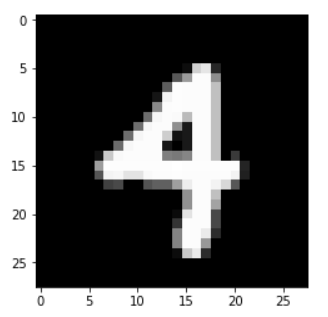


Grayscale img [ pixels are set to 255 (white) or 0 (black) ]

In [2]:
def load_images_from_folder(folder):
    train_data = []
    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder not found: {folder}")
    

    # iterate over folder to read all images and store them in a lisst to process
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)


        # reeading image in grayscale 
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is not None:

            # Thresholding the image
            ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
            # thresh contains the binary image, and ret is the threshold value used

            # finding and sorting contours
            ctrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # ctrs contains the list of contours, and _ contains hierarchy info

            cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            
            # resizing dimensions [ standard dimensions for ml tasks are 28x28 ]
            w = int(28)  
            h = int(28)  

            train_data.append(img)
    return train_data


Thresholding images :
    
    1. used to convert grayscale img to binary image by applying a threshold to the image

    2. Pixels with intensity >= 127 are set to 255 (white color), and others are set to 0 (black)


Contours :

    1. Identifies contours (edges/boundaries of shapes) in the binary image & 

    2. cv2.RETR_EXTERNAL retrieves only the outermost contours.
       
       cv2.boundingRect(ctr) computes the bounding rectangle for each contour.



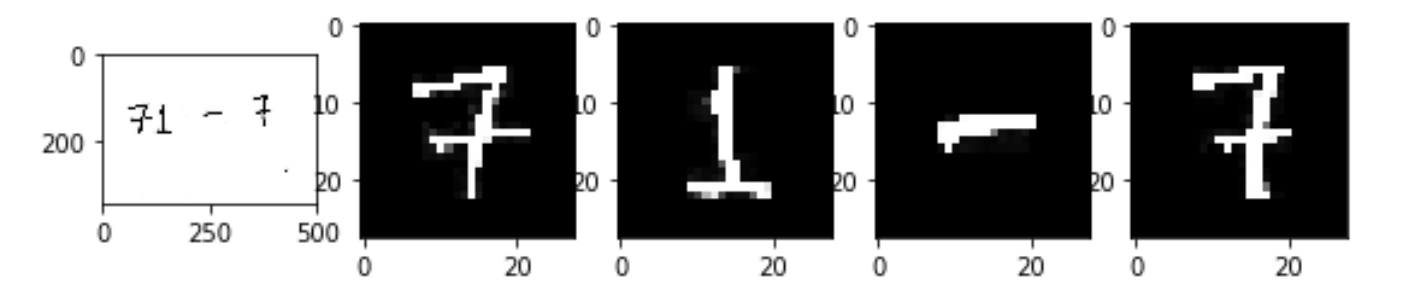

Contouring and bounding rectangle for each character

In [3]:
data = []

In [ ]:
#assign '-' to 10
# data = load_images_from_folder('-') replace thing inside '' with the path of respective folder
data = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\-')


for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    # appending '10' modifies the data for each image by adding an additional value to the image's pixel data, likely to act as a label or metadata.

print(len(data))

33997


the metadata is added to distinguish the flattened version of the image array (numpy values)


for 0-9 tht specific number is appended....for operators ( + / - / *  ) we apppend 10-12 to create a distinction in data.

In [ ]:
#assign '+' operator to 11
data11 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\+')



for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])

data=np.concatenate((data,data11))

print(len(data))

59109


In [ ]:
#assign '*' to 12
data12 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])

data=np.concatenate((data,data12))

print(len(data))

62360


In [ ]:
#assign '0' to 0 (and so on from now)
data0 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])

data=np.concatenate((data,data0))

print(len(data))

67825


In [ ]:
data1 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])

data=np.concatenate((data,data1))

print(len(data))

94345


In [ ]:
data2 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])

data=np.concatenate((data,data2))

print(len(data))

120486


In [10]:
data3 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])

data=np.concatenate((data,data3))

print(len(data))

131395


In [11]:
data4 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])

data=np.concatenate((data,data4))

print(len(data))

138791


In [12]:
data5 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])

data=np.concatenate((data,data5))

print(len(data))

142336


In [13]:
data6 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])

data=np.concatenate((data,data6))

print(len(data))

145454


In [14]:
data7 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])

data=np.concatenate((data,data7))

print(len(data))

148363


In [ ]:
data8 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])

data=np.concatenate((data,data8))

print(len(data))

151431


In [ ]:
data9 = load_images_from_folder(r'C:\Users\Abhishek\Downloads\extracted_images\9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])

data=np.concatenate((data,data9))

print(len(data))

152376


create a ( .csv ) file containing all the data gathered from numpy array of the flattened image

In [17]:
df = pd.DataFrame(data, index=None)

df.to_csv('dataset.csv', index=False)